# Heart Disease Prediction with Logistic Regression

In [20]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [22]:
#Read the the dataset
dataset = pd.read_csv(r"C:\Users\ASUS\Downloads\heart_disease (1).csv")

In [3]:
dataset.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
dataset.info

<bound method DataFrame.info of       age  gender   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0    63.0     1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1    67.0     1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2    67.0     1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3    37.0     1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4    41.0     0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   
..    ...     ...  ...       ...    ...  ...      ...      ...    ...   
298  45.0     1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0   
299  68.0     1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0   
300  57.0     1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0   
301  57.0     0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0   
302  38.0     1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0   

     oldpeak  slope   ca  thal  heart_diagnosis  
0        2.3    3.0  0.0   6.0           

In [5]:
dataset.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        age  gender     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False   False  False     False  False  False    False    False  False   
1    False   False  False     False  False  False    False    False  False   
2    False   False  False     False  False  False    False    False  False   
3    False   False  False     False  False  False    False    False  False   
4    False   False  False     False  False  False    False    False  False   
..     ...     ...    ...       ...    ...    ...      ...      ...    ...   
298  False   False  False     False  False  False    False    False  False   
299  False   False  False     False  False  False    False    False  False   
300  False   False  False     False  False  False    False    False  False   
301  False   False  False     False  False  False    False    False  False   
302  False   False  False     False  False  False    False    False  False   

 

In [6]:
dataset.shape

(303, 14)

In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset['cp'].value_counts()

cp
4.0    142
3.0     83
2.0     49
1.0     23
Name: count, dtype: int64

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [13]:
dataset.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart_diagnosis'],
      dtype='object')

In [14]:
dataset['heart_diagnosis'].value_counts()

heart_diagnosis
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [15]:
#set the a thershold to convert grater then zero values  as 1 and other wise zero

def replace_non_zero_with_nan(x):
    if x != 0:
        return 1
    else:
        return 0

dataset['heart_diagnosis'] = dataset['heart_diagnosis'].apply(replace_non_zero_with_nan)

In [16]:
dataset.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


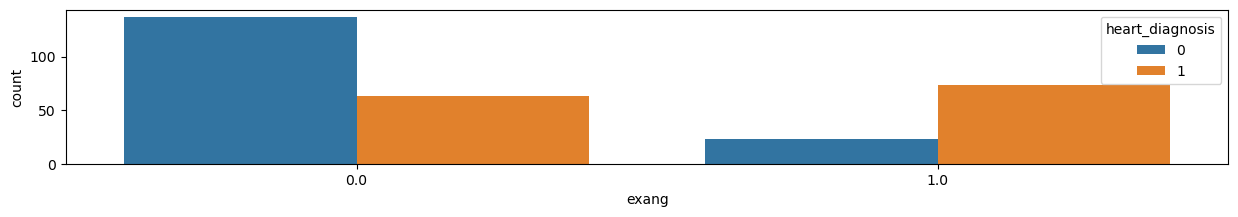

In [17]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x='exang',hue='heart_diagnosis')
plt.show()

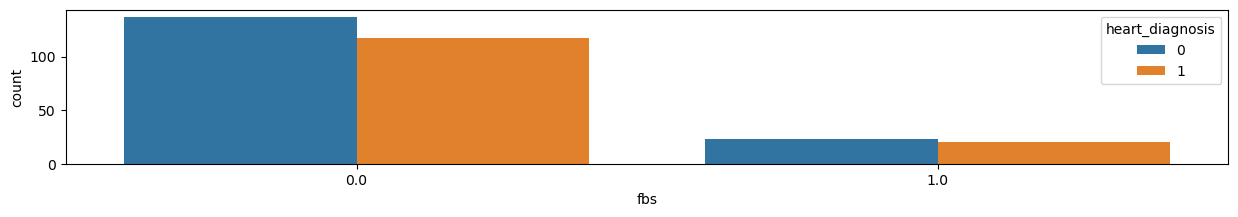

In [19]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x='fbs',hue='heart_diagnosis')
plt.show()


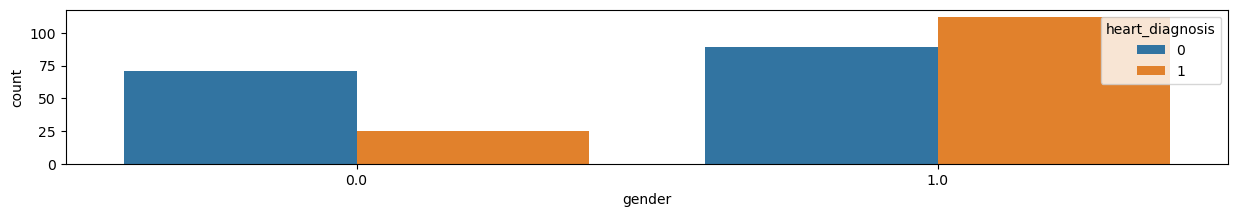

gender male=1 female=0


In [20]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x='gender',hue='heart_diagnosis')
plt.show()
print('gender male=1 female=0')

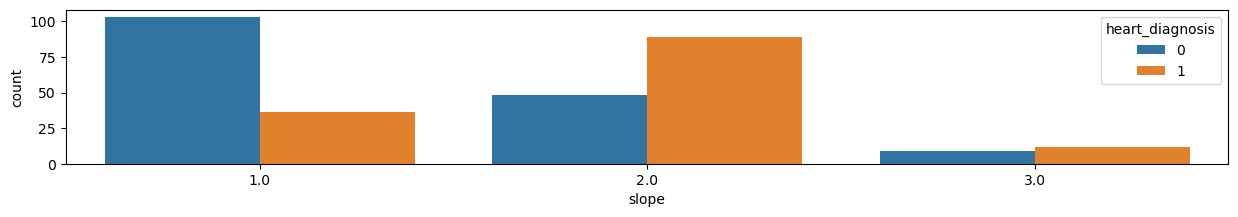

slope: The slope of the peak exercise ST segment.


In [21]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x='slope',hue='heart_diagnosis')
plt.show()
print('slope: The slope of the peak exercise ST segment.')

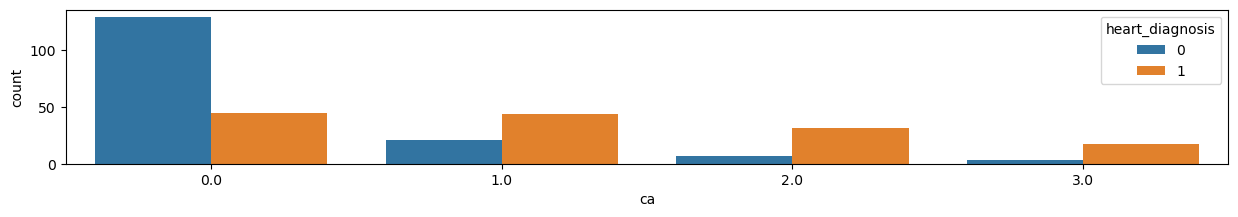

ca: Number of major vessels (0-3) colored by fluoroscopy.


In [22]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x='ca',hue='heart_diagnosis')
plt.show()
print('ca: Number of major vessels (0-3) colored by fluoroscopy.')

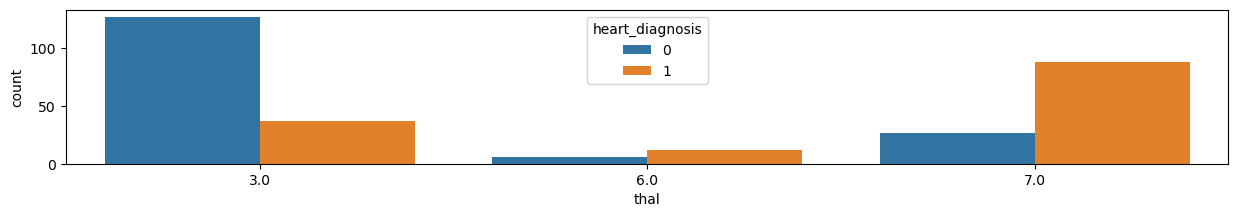

thal: 3 = normal; 6 = fixed defect; 7 = reversible defect.


In [23]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x='thal',hue='heart_diagnosis')
plt.show()
print('thal: 3 = normal; 6 = fixed defect; 7 = reversible defect.')

In [24]:
dataset.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart_diagnosis'],
      dtype='object')

In [25]:
#Transform the categorical data

In [26]:
#spilt the data into train and test part

x=dataset.drop('heart_diagnosis',axis=1)

In [27]:
y=dataset['heart_diagnosis']

In [28]:
numerical = []
categorical = []
for i in x.columns:
    if x[i].dtype == 'int64' or x[i].dtype == 'float64':
            numerical.append(i)
    else:
            categorical.append(i)

print(numerical,categorical)


['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] []


In [29]:
#In this dataset we do not have any categorical feature, so Encoding in this dataset is not required

In [31]:
#Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(x)

# Remove the binary columns from the numerical columns
numerical_no_binary = [i for i in numerical if i not in binary_cols]


In [32]:
len(numerical)

13

In [33]:
def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset_scaled= feature_scaling(x, numerical)

In [34]:
dataset_scaled.shape

(297, 13)

In [35]:
x_new=dataset_scaled

In [36]:
#Splitting the dataset into train and test based on the 70-30 ratio

x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.20,random_state=42)


In [37]:
#Applying the Logistic Regression on the training dataset

logmodel_ini = LogisticRegression()
logmodel_ini.fit(x_train,y_train)


LogisticRegression()

In [38]:
y_pred_ini = logmodel_ini.predict(x_test)
y_pred_ini

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

[[32  4]
 [ 4 20]]


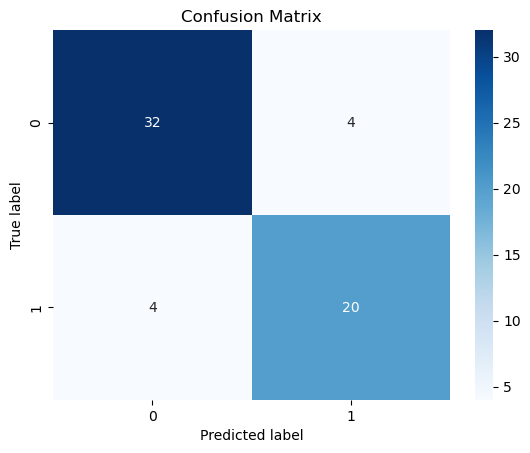

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ini)
print(cm)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [40]:
# Accuracy score
accuracy_score(y_test, y_pred_ini)

0.8666666666666667

In [41]:
#  Get the feature importance.

feature_importance = logmodel_ini.coef_
feature_importance = pd.Series(feature_importance[0], index=x_train.columns)
feature_importance.sort_values(ascending=False)

ca          1.128855
gender      0.649846
thal        0.530345
trestbps    0.462090
exang       0.425176
cp          0.363572
oldpeak     0.342966
chol        0.320678
slope       0.245121
restecg     0.205253
age        -0.067187
fbs        -0.424907
thalach    -0.467264
dtype: float64

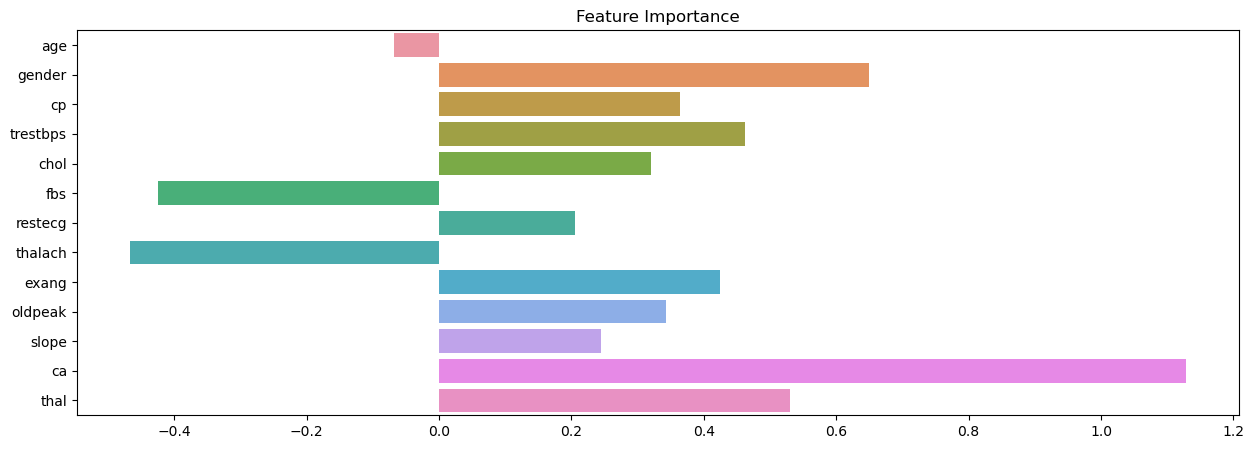

In [42]:
 #Create a bar plot of the feature importance
    
plt.figure(figsize=(15,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

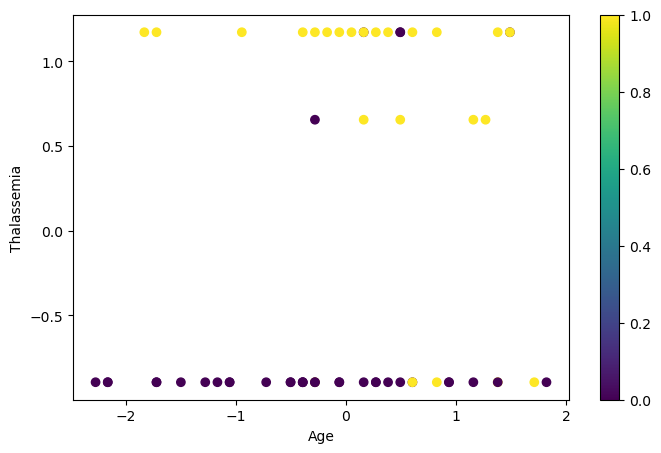

In [43]:
y_pred_proba = logmodel_ini.predict_proba(x_test)

plt.figure(figsize=(8, 5))
plt.scatter(x_test['age'], x_test['thal'], c=y_test, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Thalassemia')
plt.colorbar()
plt.show()


In [44]:
logmodel_ridge = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
logmodel_ridge.fit(x_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [45]:
logmodel_ridge.coef_

array([[ 0.07188543,  0.16086989,  0.17155923,  0.09598614,  0.06038201,
        -0.05807929,  0.07057063, -0.17481874,  0.18979914,  0.1751891 ,
         0.1026683 ,  0.26743096,  0.25068116]])